# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from arctic_objects import *
from arctic_functions import *
import scipy.io as sio
import netCDF4 as nc
import numpy as np

In [3]:
# Paths to Data and Figures
MIT0_fp = '/ocean/jolerner/data/MITGCM/'

runs = ['CTL', 'OBS', 'REG', 'HI', 'LO']

NEMO_fp = '/ocean/jolerner/data/NEMO/'

ASTE_fp = '/ocean/jolerner/data/ASTE/'

WODC_fp = '/ocean/jolerner/data/WOD/'

SAVE_fp = '/ocean/jolerner/plots/'

# Define Callback Functions
contour={'func':potentialDensity, 'args':{'ref':0}}

In [4]:
# Load Grids and Regions
MIT0_grid = sio.loadmat(MIT0_fp + 'grid.mat', simplify_cells=True)['grid']
NEMO_grid = sio.loadmat(NEMO_fp + 'grid.mat', simplify_cells=True)['grid']
ASTE_grid = sio.loadmat(ASTE_fp + 'grid.mat', simplify_cells=True)['grid']

MIT0_reg = sio.loadmat(MIT0_fp + 'regions.mat', simplify_cells=True)['regions']
NEMO_reg = sio.loadmat(NEMO_fp + 'regions.mat', simplify_cells=True)['regions']
ASTE_reg = sio.loadmat(ASTE_fp + 'regions.mat', simplify_cells=True)['regions']
MIT0_reg = makeRegions(ASTE_reg, ASTE_grid, MIT0_grid)

In [5]:
dataT = sio.loadmat(ASTE_fp + 'CTL_' + 'DIFFzTH' + '_2008-2012avg.mat', simplify_cells=True)
dataS = sio.loadmat(ASTE_fp + 'CTL_' + 'DIFFzSLT' + '_2008-2012avg.mat', simplify_cells=True)

fields = {'Heat': {}, 'Salt': {}}

for field in ['Total', 'Background', 'KPP', 'Redi', 'Implicit','Explicit']:
    if field == 'Redi':
        fields['Heat'][field] = Field(field, dataT['Implicit']['name'], dataT['Implicit']['units'], 
                                      dataT['Implicit']['data'] + dataT['Explicit']['data'], ASTE_grid, ASTE_reg)
        fields['Salt'][field] = Field(field, dataS['Implicit']['name'], dataS['Implicit']['units'], 
                                      dataS['Implicit']['data'] + dataS['Explicit']['data'], ASTE_grid, ASTE_reg)
    else:
        fields['Heat'][field] = Field(field, dataT[field]['name'], dataT[field]['units'], dataT[field]['data'], ASTE_grid, ASTE_reg)
        fields['Salt'][field] = Field(field, dataS[field]['name'], dataS[field]['units'], dataS[field]['data'], ASTE_grid, ASTE_reg)
    
dataK = sio.loadmat(ASTE_fp + 'CTL_' + 'kappa' + '_2008-2012avg.mat', simplify_cells=True)
fields['Kappa'] = {}

for field in ['Total', 'Background', 'KPP', 'Redi']:
    fields['Kappa'][field] = Field(field, dataK[field]['name'], 'c'+dataK[field]['units'], 10000*dataK[field]['data'], ASTE_grid, ASTE_reg)

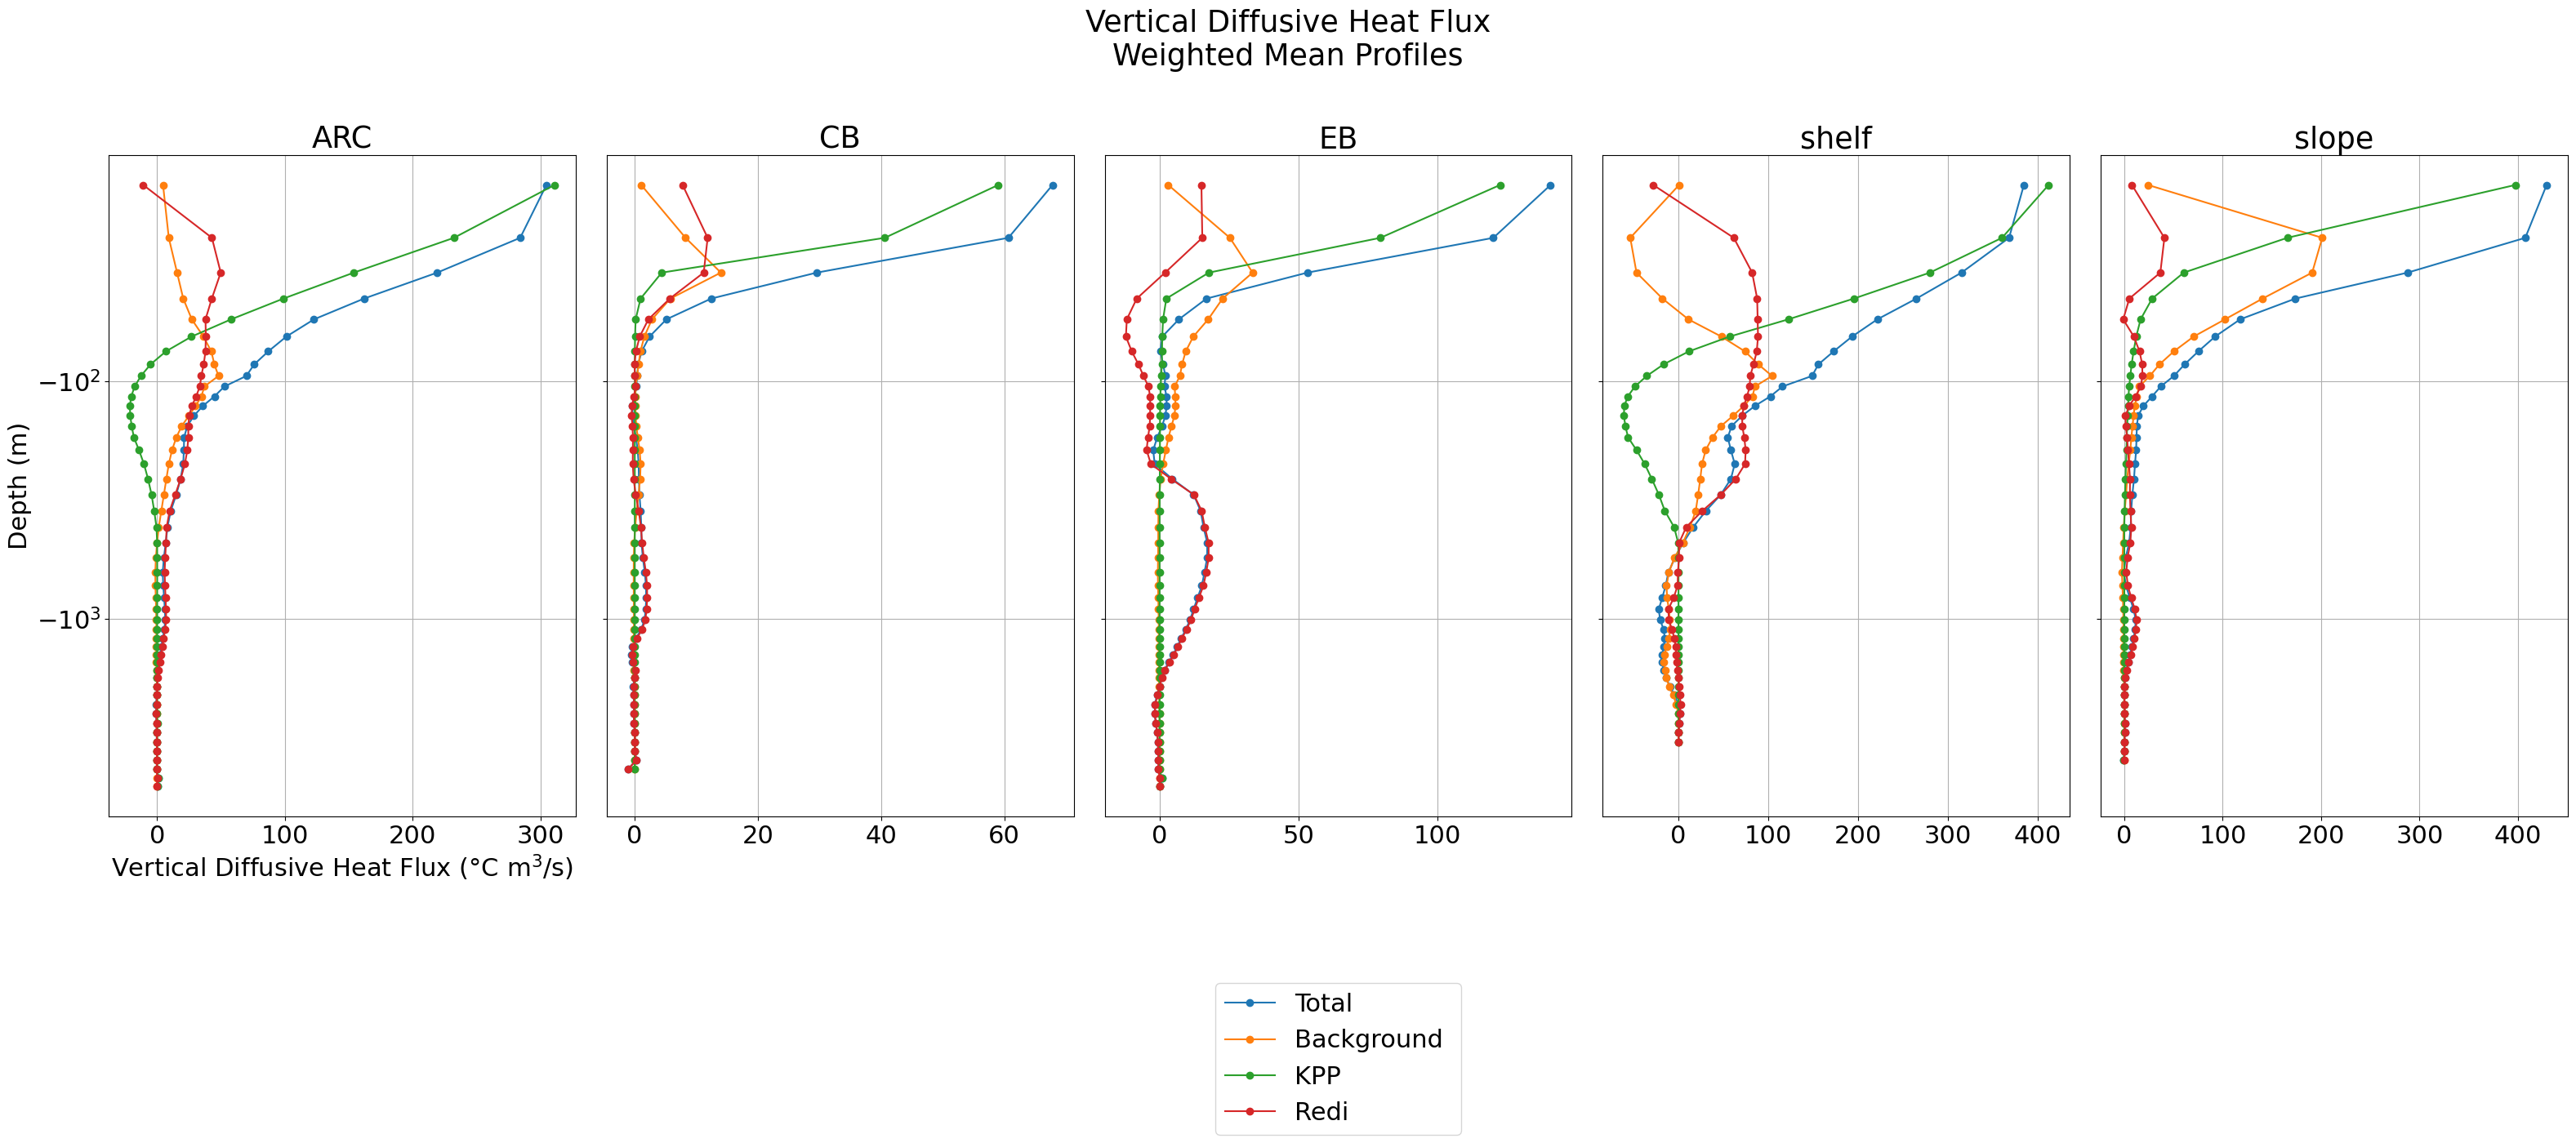

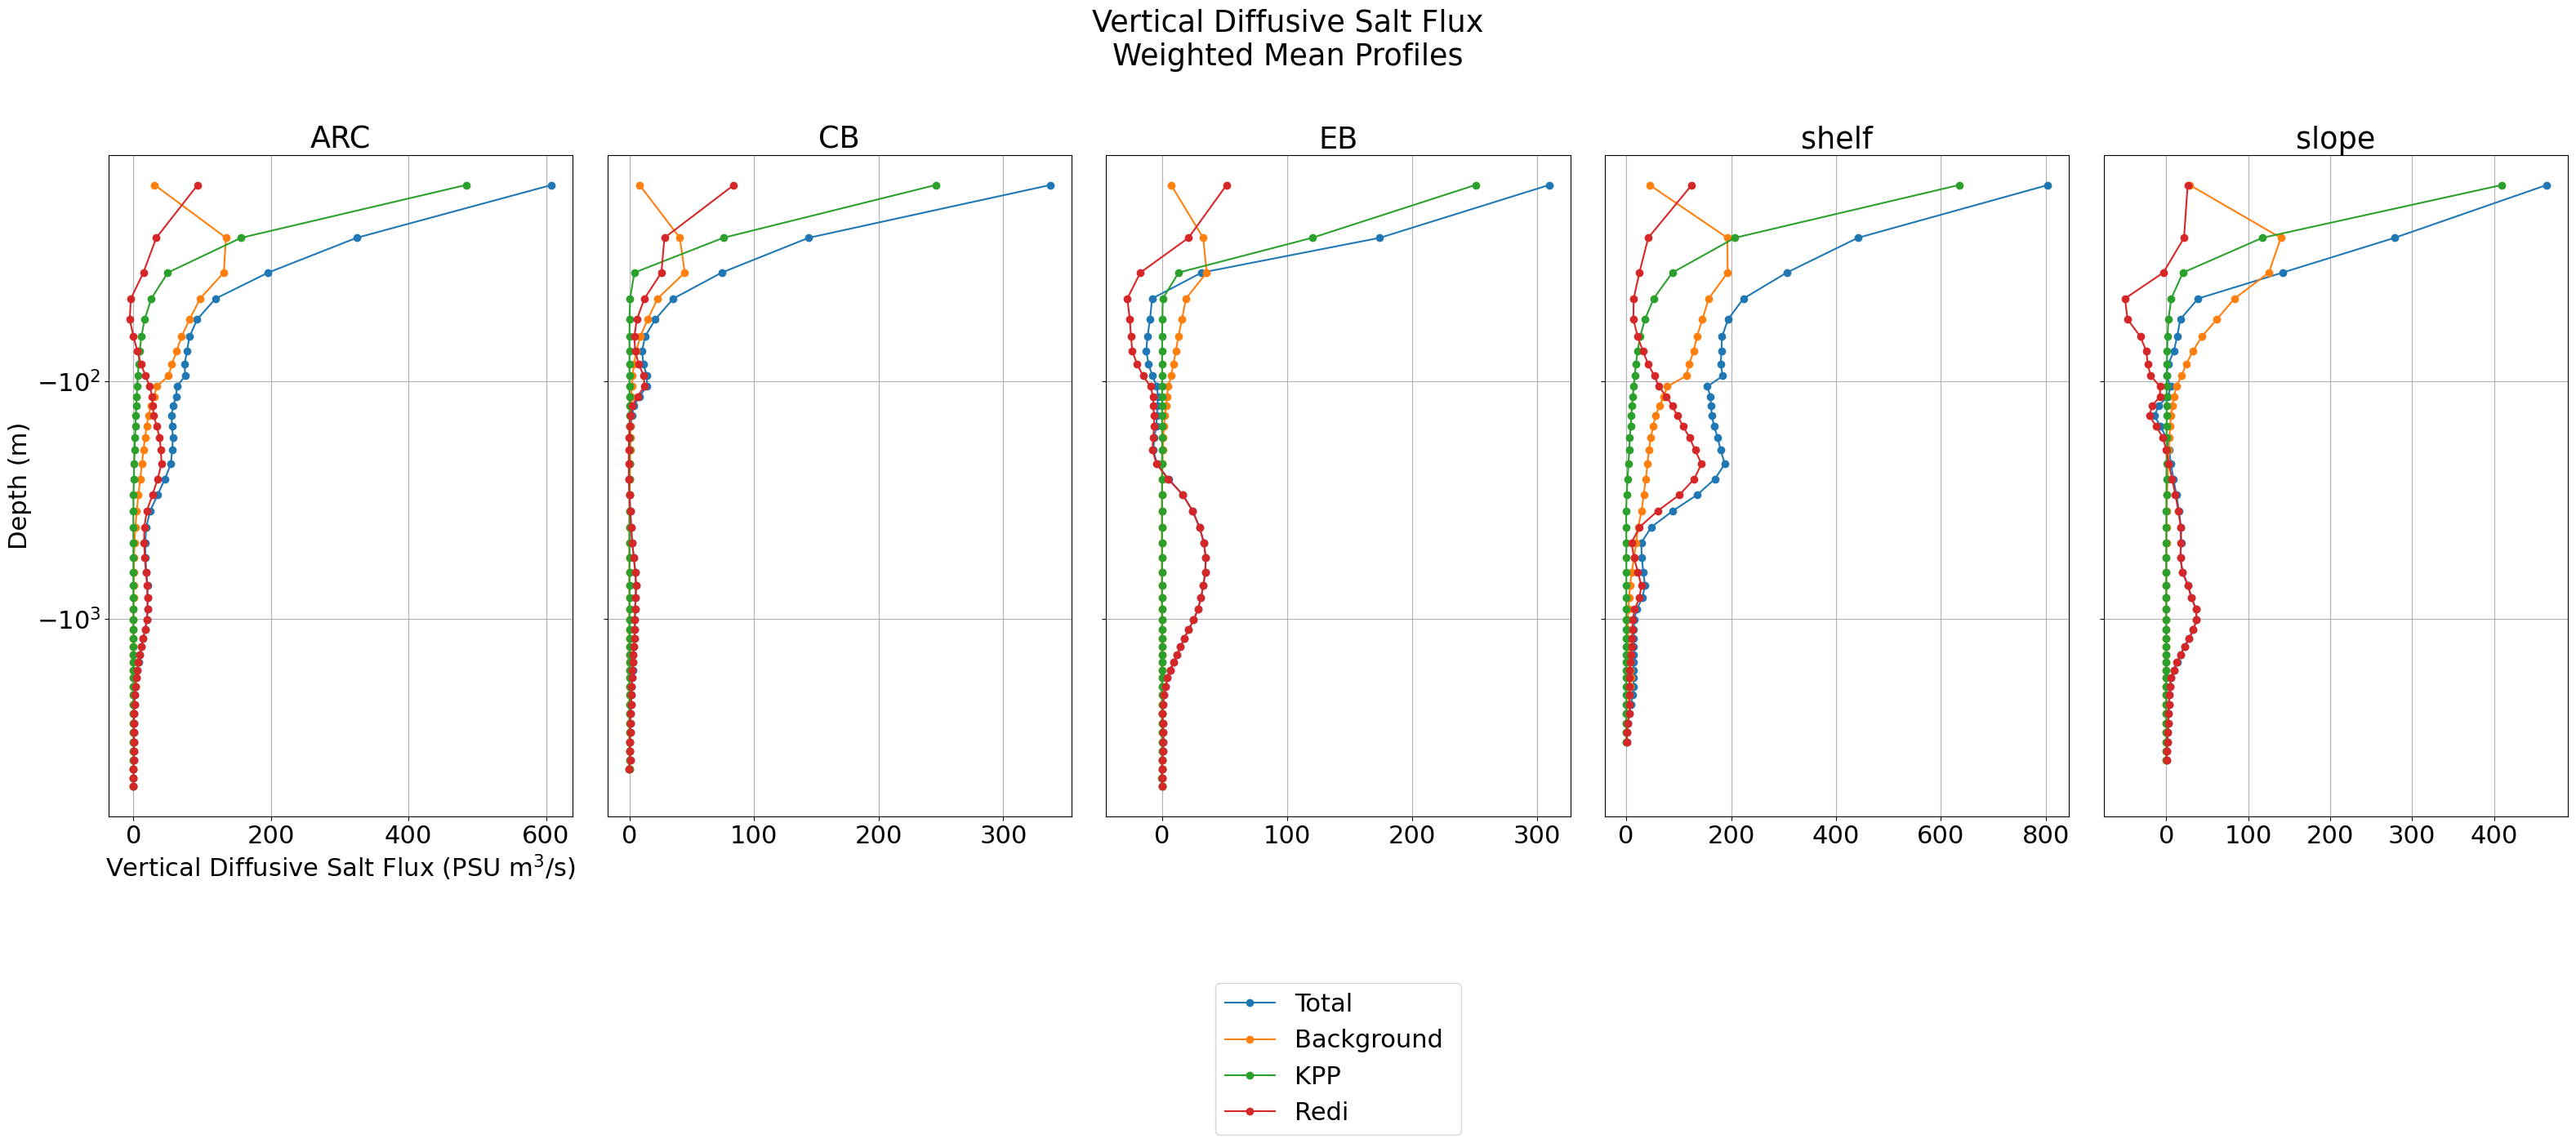

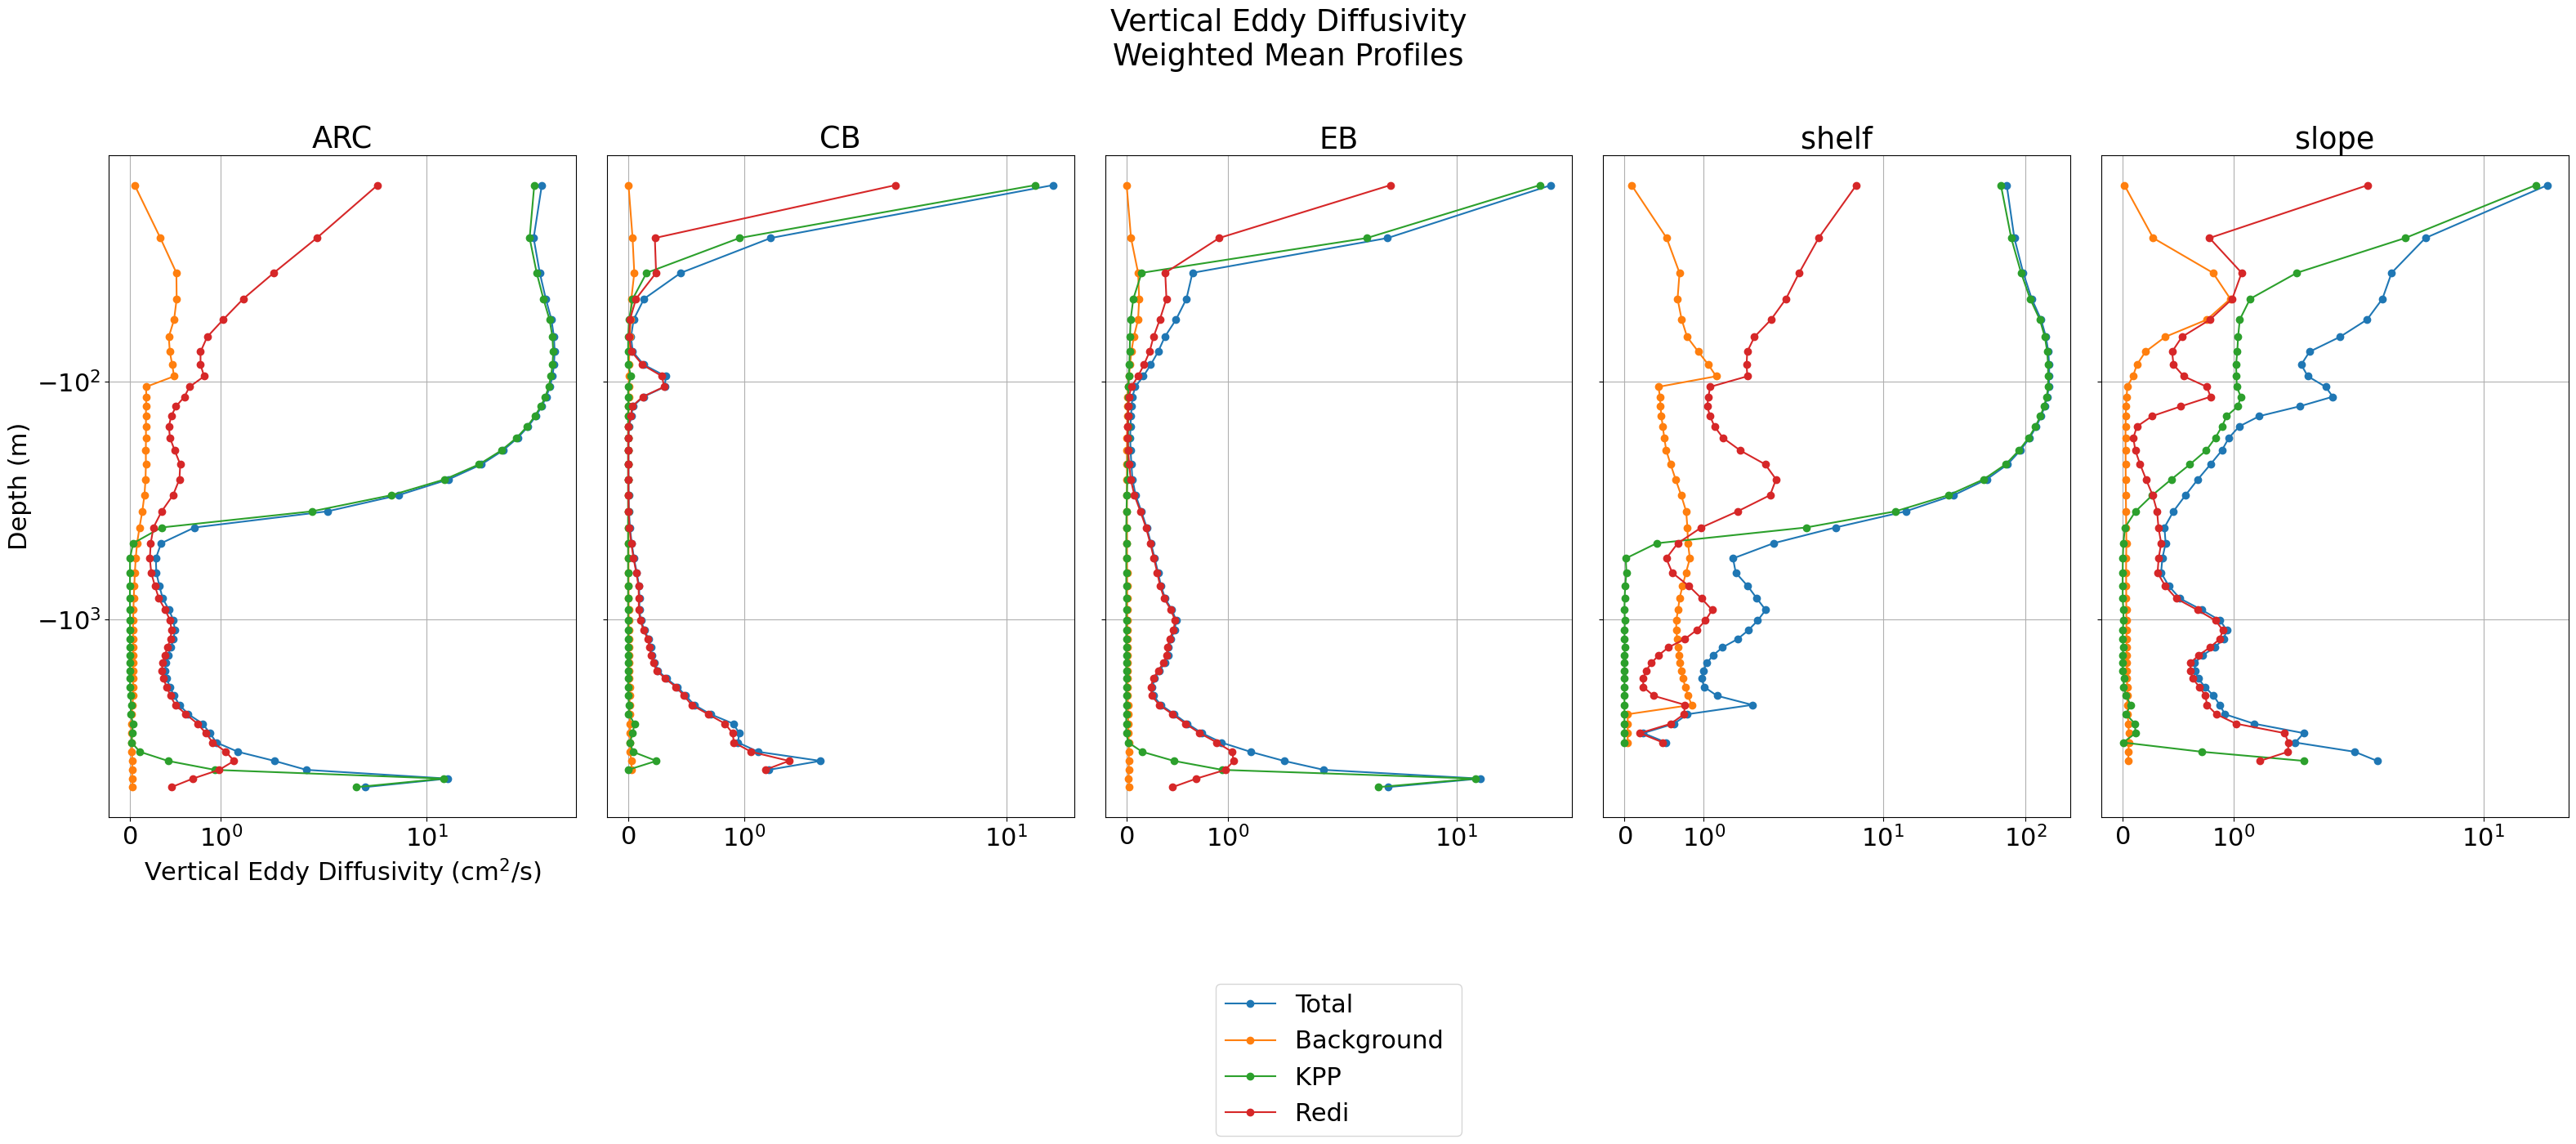

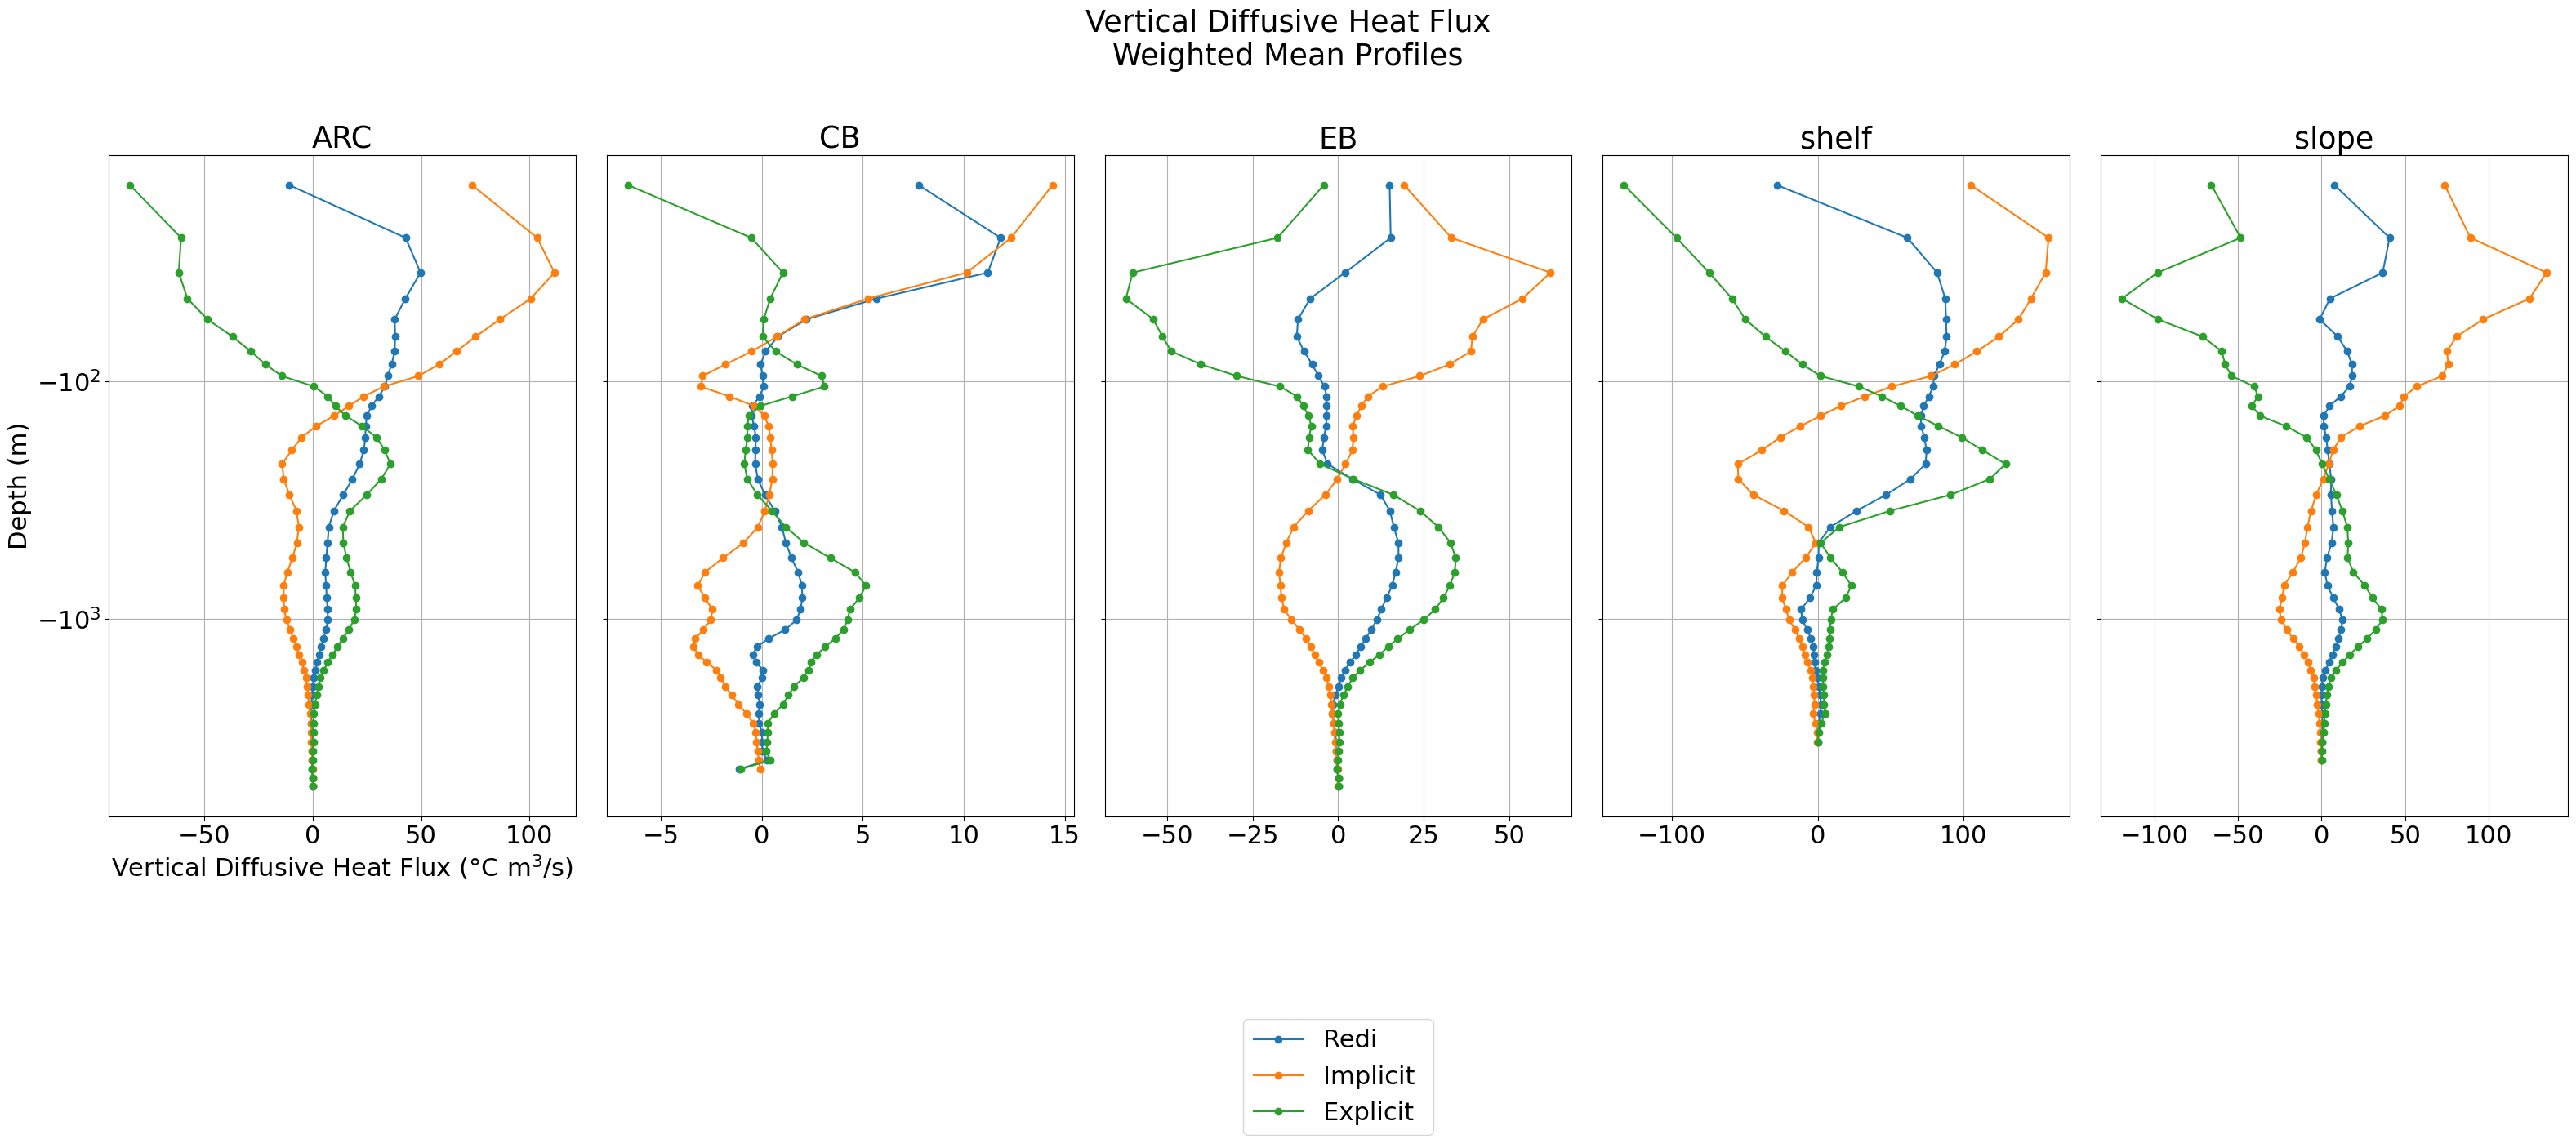

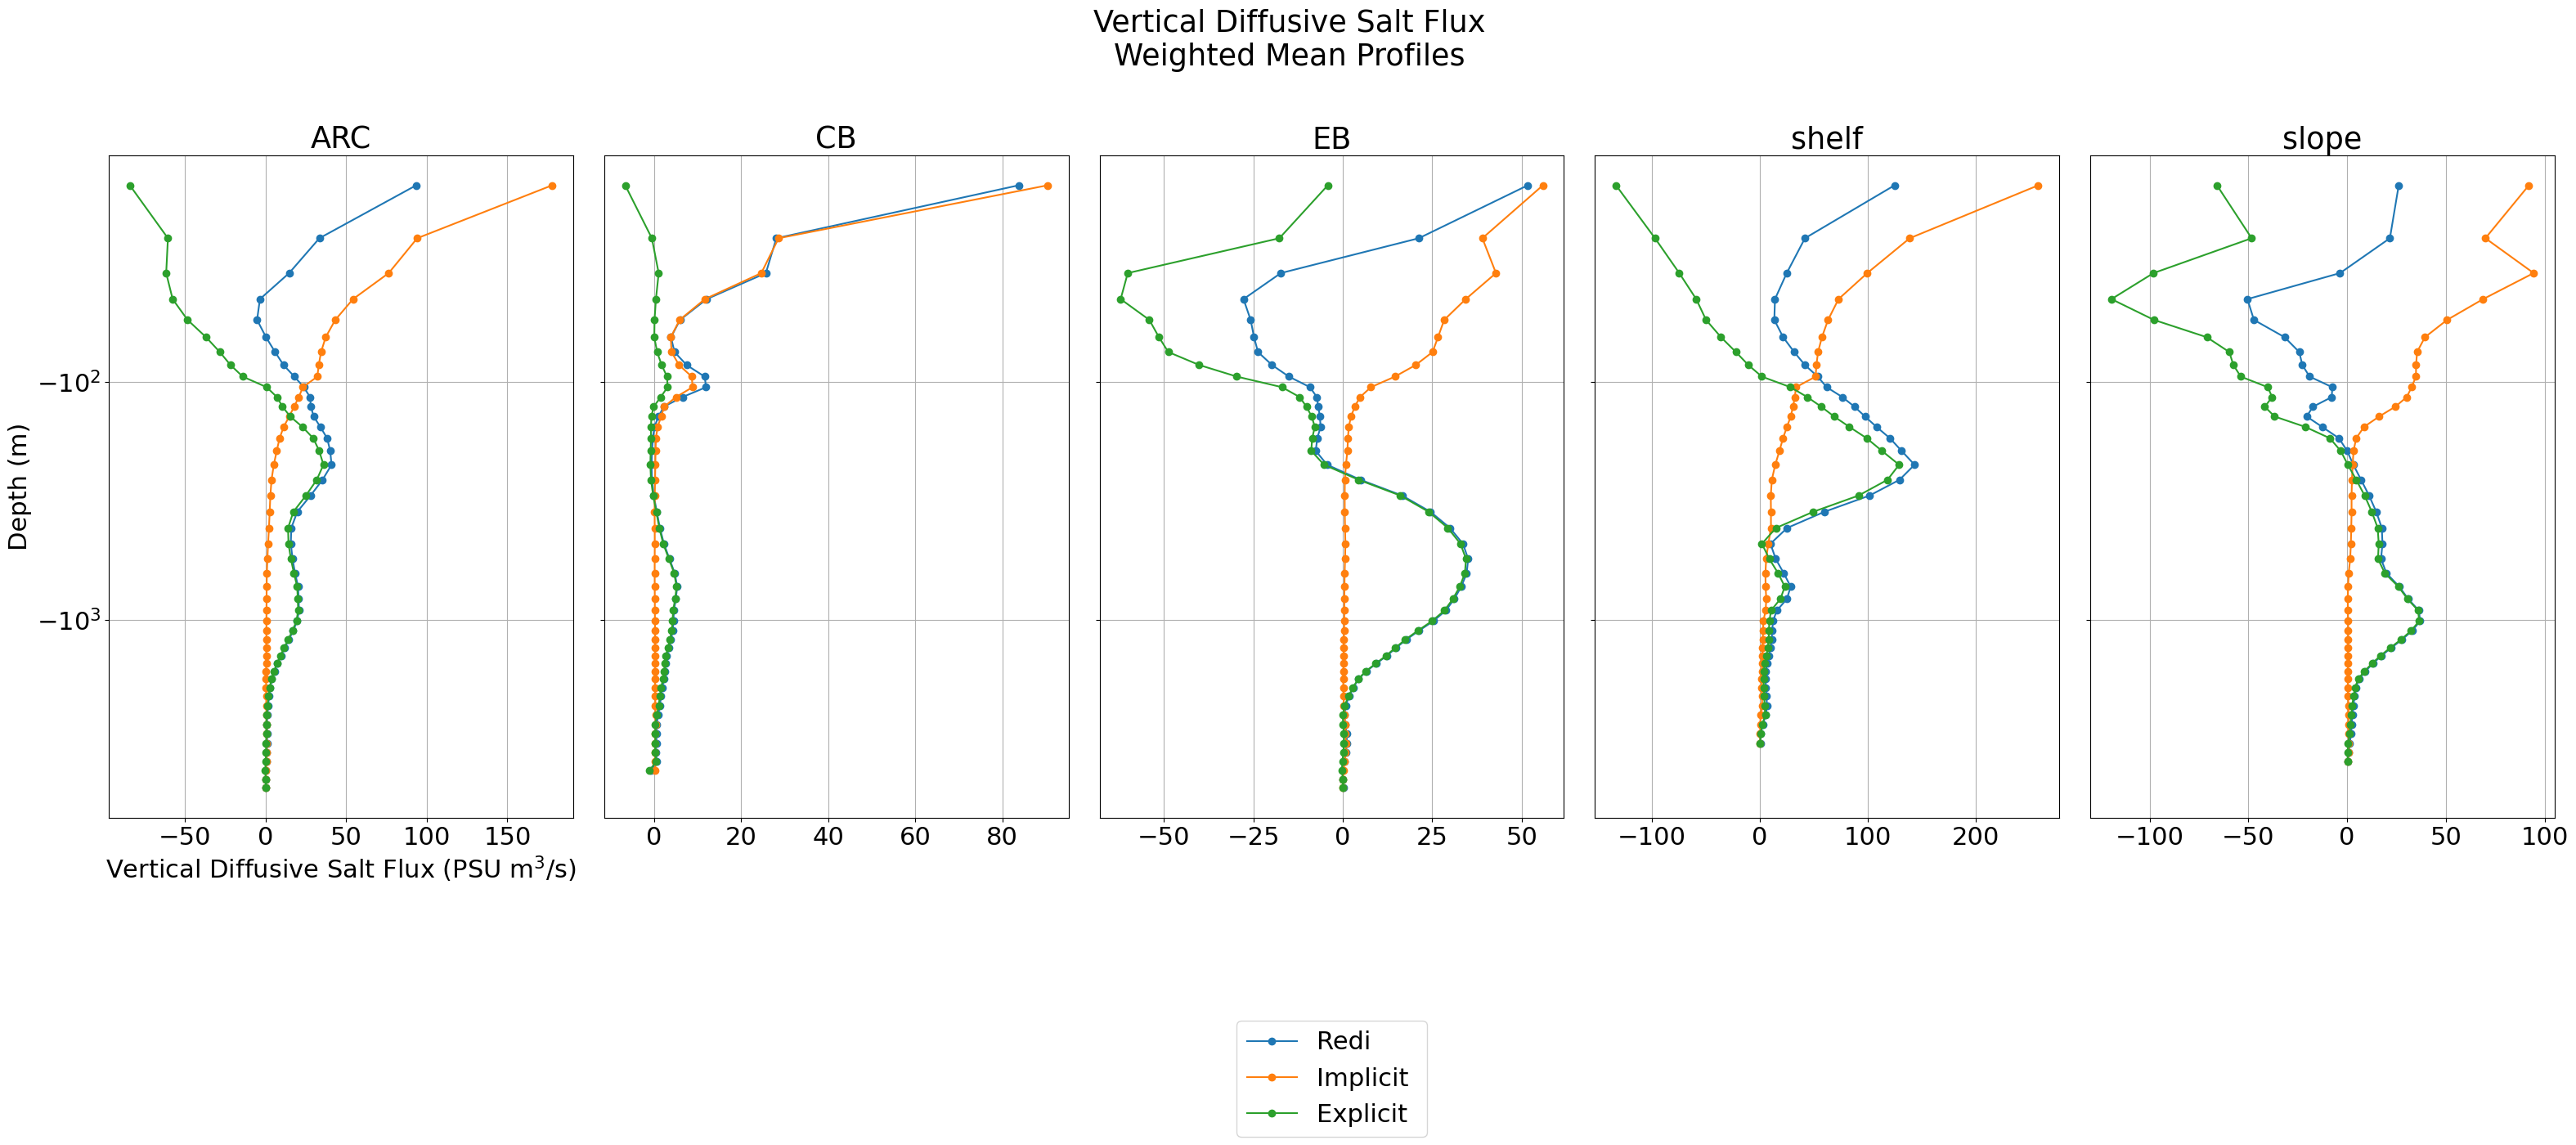

In [6]:
visualize_average_profiles([*fields['Heat'].values()][:4], show=True).savefig('export/ASTE/' + 'DIFFzTH' + '_avgProfiles.png')
visualize_average_profiles([*fields['Salt'].values()][:4], show=True).savefig('export/ASTE/' + 'DIFFzSLT' + '_avgProfiles.png')
visualize_average_profiles([*fields['Kappa'].values()], scale='symlog', show=True).savefig('export/ASTE/' + 'kappa' + '_avgProfiles.png')

visualize_average_profiles([*fields['Heat'].values()][3:], show=True).savefig('export/ASTE/' + 'DIFFzTH' + '_Redi_avgProfiles.png')
visualize_average_profiles([*fields['Salt'].values()][3:], show=True).savefig('export/ASTE/' + 'DIFFzSLT' + '_Redi_avgProfiles.png')

In [5]:
# Load Transects

CBAR_coords = ([-144, 70], [25, 70])
FRAM_coords = ([-16.67, 80.67], [11.7, 79])
BFGY_coords = ([-144, 70], [-144, 83])

MIT0_CBAR = Transect('CANBAR Transect', MIT0_grid, CBAR_coords[0], CBAR_coords[1])
ASTE_CBAR = Transect('CANBAR Transect', ASTE_grid, CBAR_coords[0], CBAR_coords[1])
NEMO_CBAR = Transect('CANBAR Transect', NEMO_grid, CBAR_coords[0], CBAR_coords[1])

MIT0_FRAM = Transect('FRAM Transect', MIT0_grid, FRAM_coords[0], FRAM_coords[1])
ASTE_FRAM = Transect('FRAM Transect', ASTE_grid, FRAM_coords[0], FRAM_coords[1])
NEMO_FRAM = Transect('FRAM Transect', NEMO_grid, FRAM_coords[0], FRAM_coords[1])

MIT0_BFGY = Transect('Beaufort Gyre Transect', MIT0_grid, BFGY_coords[0], BFGY_coords[1])
ASTE_BFGY = Transect('Beaufort Gyre Transect', ASTE_grid, BFGY_coords[0], BFGY_coords[1])
NEMO_BFGY = Transect('Beaufort Gyre Transect', NEMO_grid, BFGY_coords[0], BFGY_coords[1])


In [8]:
Kkwargs = {'scale':'symlog', 'vmin':0, 'vmax':3, 'show':False}
Tkwargs = {'scale':'symlog', 'vmin':-4, 'vmax':4, 'show':False}
Skwargs = {'scale':'symlog', 'vmin':-4, 'vmax':4, 'show':False}

for field in ['Total', 'Background', 'KPP', 'Redi']:
    fields['Kappa'][field].data[fields['Kappa'][field].data == 0] = 10**(-12)
    fields['Heat'][field].data[fields['Heat'][field].data == 0] = 10**(-12)
    fields['Salt'][field].data[fields['Salt'][field].data == 0] = 10**(-12)
    
    ASTE_CBAR.visualize_transect(fields['Heat'][field], **Tkwargs).savefig('export/ASTE/' + field + '_TH_CanbarTransect.png')
    ASTE_FRAM.visualize_transect(fields['Heat'][field], **Tkwargs).savefig('export/ASTE/' + field + '_TH_FramTransect.png')
    ASTE_BFGY.visualize_transect(fields['Heat'][field], **Tkwargs).savefig('export/ASTE/' + field + '_TH_BeaufortTransect.png')
    
    ASTE_CBAR.visualize_transect(fields['Salt'][field], **Skwargs).savefig('export/ASTE/' + field + '_SLT_CanbarTransect.png')
    ASTE_FRAM.visualize_transect(fields['Salt'][field], **Skwargs).savefig('export/ASTE/' + field + '_SLT_FramTransect.png')
    ASTE_BFGY.visualize_transect(fields['Salt'][field], **Skwargs).savefig('export/ASTE/' + field + '_SLT_BeaufortTransect.png')    
    
    ASTE_CBAR.visualize_transect(fields['Kappa'][field], **Kkwargs).savefig('export/ASTE/' + field + '_Kappa_CanbarTransect.png')
    ASTE_FRAM.visualize_transect(fields['Kappa'][field], **Kkwargs).savefig('export/ASTE/' + field + '_Kappa_FramTransect.png')
    ASTE_BFGY.visualize_transect(fields['Kappa'][field], **Kkwargs).savefig('export/ASTE/' + field + '_Kappa_BeaufortTransect.png')

In [9]:
for field in ['Redi', 'Implicit', 'Explicit']:
    ASTE_CBAR.visualize_transect(fields['Heat'][field], **Tkwargs).savefig('export/ASTE/split_' + field + '_TH_CanbarTransect.png')
    ASTE_FRAM.visualize_transect(fields['Heat'][field], **Tkwargs).savefig('export/ASTE/split_' + field + '_TH_FramTransect.png')
    ASTE_BFGY.visualize_transect(fields['Heat'][field], **Tkwargs).savefig('export/ASTE/split_' + field + '_TH_BeaufortTransect.png')
    
    ASTE_CBAR.visualize_transect(fields['Salt'][field], **Skwargs).savefig('export/ASTE/split_' + field + '_SLT_CanbarTransect.png')
    ASTE_FRAM.visualize_transect(fields['Salt'][field], **Skwargs).savefig('export/ASTE/split_' + field + '_SLT_FramTransect.png')
    ASTE_BFGY.visualize_transect(fields['Salt'][field], **Skwargs).savefig('export/ASTE/split_' + field + '_SLT_BeaufortTransect.png')    
    

# Data

In [6]:
fields = {}
anom_fields = {}

## Temperature

In [7]:
file_name = 'theta'
field_name = 'theta'

In [8]:
fields[field_name] = {}
anom_fields[field_name] = {}

data = sio.loadmat(WODC_fp + file_name + '_2005-2014avg.mat', simplify_cells=True)[field_name]
fields[field_name]['WOD'] = Field('WOD', data['long_name'], data['units'], resample(data['data'], NEMO_grid, MIT0_grid), MIT0_grid, MIT0_reg)
for run in runs:
    data = sio.loadmat(MIT0_fp + run + '/' + run + '_'+ file_name +'_2008-2012avg.mat', simplify_cells=True)[field_name]
    fields[field_name][run] = Field(run, data['long_name'], data['units'], data['data'], MIT0_grid, MIT0_reg)
    anom_fields[field_name][run + '-WOD'] = Field(run + ' - WOD', data['long_name'], data['units'], 
                                                    fields[field_name][run].data - fields[field_name]['WOD'].data, MIT0_grid, MIT0_reg)
    if run != 'CTL':
        anom_fields[field_name][run + '-CTL'] = Field(run + ' - CTL', data['long_name'], data['units'], 
                                                        fields[field_name][run].data - fields[field_name]['CTL'].data, MIT0_grid, MIT0_reg)


/home/jolerner/arcticMix/arctic_functions.py:252: RuntimeWarning: Mean of empty slice
  new_data = np.nanmean(flat_data[idx], axis=1)


### Vertical Gradient of Temperature

In [9]:
fields['g_' + field_name] = {}
anom_fields['g_' + field_name] = {}

data = sio.loadmat(WODC_fp + file_name + '_2005-2014avg.mat', simplify_cells=True)[field_name]
fields['g_' + field_name]['WOD'] = Field('WOD', 'Vertical Gradient of ' + data['long_name'], data['units'] + '/m', 
                      zGradient(resample(data['data'], NEMO_grid, MIT0_grid), MIT0_grid), MIT0_grid, MIT0_reg)
for run in runs:
    data = sio.loadmat(MIT0_fp + run + '/' + run + '_'+ file_name +'_2008-2012avg.mat', simplify_cells=True)[field_name]
    fields['g_' + field_name][run] = Field(run, 'Vertical Gradient of ' + data['long_name'], data['units'] + '/m', 
                        zGradient(data['data'], MIT0_grid), MIT0_grid, MIT0_reg)
    anom_fields['g_' + field_name][run + '-WOD'] = Field(run + ' - WOD', 'Vertical Gradient of ' + data['long_name'], data['units'] + '/m', 
                                        fields['g_' + field_name][run].data - fields['g_' + field_name]['WOD'].data, MIT0_grid, MIT0_reg)
    if run != 'CTL':
        anom_fields['g_' + field_name][run + '-CTL'] = Field(run + ' - CTL', 'Vertical Gradient of ' + data['long_name'], data['units'] + '/m', 
                                            fields['g_' + field_name][run].data - fields['g_' + field_name]['CTL'].data, MIT0_grid, MIT0_reg)


## Salinity

In [10]:
file_name = 'salinity'
field_name = 'salinity'

In [11]:
fields[field_name] = {}
anom_fields[field_name] = {}

data = sio.loadmat(WODC_fp + file_name + '_2005-2014avg.mat', simplify_cells=True)[field_name]
fields[field_name]['WOD'] = Field('WOD', data['long_name'], data['units'], resample(data['data'], NEMO_grid, MIT0_grid), MIT0_grid, MIT0_reg)
for run in runs:
    data = sio.loadmat(MIT0_fp + run + '/' + run + '_'+ file_name +'_2008-2012avg.mat', simplify_cells=True)[field_name]
    fields[field_name][run] = Field(run, data['long_name'], data['units'], data['data'], MIT0_grid, MIT0_reg)
    anom_fields[field_name][run + '-WOD'] = Field(run + ' - WOD', data['long_name'], data['units'], 
                                                    fields[field_name][run].data - fields[field_name]['WOD'].data, MIT0_grid, MIT0_reg)
    if run != 'CTL':
        anom_fields[field_name][run + '-CTL'] = Field(run + ' - CTL', data['long_name'], data['units'], 
                                                        fields[field_name][run].data - fields[field_name]['CTL'].data, MIT0_grid, MIT0_reg)


### Vertical Gradient of Salinity

In [12]:
fields['g_' + field_name] = {}
anom_fields['g_' + field_name] = {}

data = sio.loadmat(WODC_fp + file_name + '_2005-2014avg.mat', simplify_cells=True)[field_name]
fields['g_' + field_name]['WOD'] = Field('WOD', 'Vertical Gradient of ' + data['long_name'], data['units'] + '/m', 
                      zGradient(resample(data['data'], NEMO_grid, MIT0_grid), MIT0_grid), MIT0_grid, MIT0_reg)
for run in runs:
    data = sio.loadmat(MIT0_fp + run + '/' + run + '_'+ file_name +'_2008-2012avg.mat', simplify_cells=True)[field_name]
    fields['g_' + field_name][run] = Field(run, 'Vertical Gradient of ' + data['long_name'], data['units'] + '/m', 
                        zGradient(data['data'], MIT0_grid), MIT0_grid, MIT0_reg)
    anom_fields['g_' + field_name][run + '-WOD'] = Field(run + ' - WOD', 'Vertical Gradient of ' + data['long_name'], data['units'] + '/m', 
                                        fields['g_' + field_name][run].data - fields['g_' + field_name]['WOD'].data, MIT0_grid, MIT0_reg)
    if run != 'CTL':
        anom_fields['g_' + field_name][run + '-CTL'] = Field(run + ' - CTL', 'Vertical Gradient of ' + data['long_name'], data['units'] + '/m', 
                                            fields['g_' + field_name][run].data - fields['g_' + field_name]['CTL'].data, MIT0_grid, MIT0_reg)


## Stratification

In [8]:
field_name = 'strat'

fields[field_name] = {}
anom_fields[field_name] = {}

pT = resample(sio.loadmat(WODC_fp + 'theta' + '_2005-2014avg.mat', simplify_cells=True)['theta']['data'], NEMO_grid, MIT0_grid)
sP = resample(sio.loadmat(WODC_fp + 'salinity' + '_2005-2014avg.mat', simplify_cells=True)['salinity']['data'], NEMO_grid, MIT0_grid)
fields[field_name]['WOD'] = Field('WOD', 'Stratification', r's$^{-2}$', 
                                  nsquared(sP, pT, MIT0_grid), MIT0_grid, MIT0_reg)
for run in runs:
    pT = sio.loadmat(MIT0_fp + run + '/' + run + '_'+ 'theta' +'_2008-2012avg.mat', simplify_cells=True)['theta']['data']
    sP = sio.loadmat(MIT0_fp + run + '/' + run + '_'+ 'salinity' +'_2008-2012avg.mat', simplify_cells=True)['salinity']['data']
    fields[field_name][run] = Field(run, 'Stratification', r's$^{-2}$', 
                                    nsquared(sP, pT, MIT0_grid), MIT0_grid, MIT0_reg)
    anom_fields[field_name][run + '-WOD'] = Field(run + ' - WOD', 'Stratification', r's$^{-2}$', 
                                                    fields[field_name][run].data - fields[field_name]['WOD'].data, MIT0_grid, MIT0_reg)
    if run != 'CTL':
        anom_fields[field_name][run + '-CTL'] = Field(run + ' - CTL', 'Stratification', r's$^{-2}$',
                                                        fields[field_name][run].data - fields[field_name]['CTL'].data, MIT0_grid, MIT0_reg)

## Vertical Diffusive Fluxes

In [14]:
file_name = 'DIFFzTH'
field_name = 'Total'

In [15]:
fields[file_name] = {}
anom_fields[file_name] = {}

data = sio.loadmat(ASTE_fp + 'CTL_' + file_name + '_2008-2012avg.mat', simplify_cells=True)[field_name]
fields[file_name]['ASTE'] = Field('ASTE', data['long_name'], data['units'], MIT0_grid['vol']*resample(data['data']/ASTE_grid['vol'], ASTE_grid, MIT0_grid), MIT0_grid, MIT0_reg)
for run in runs:
    data = sio.loadmat(MIT0_fp + run + '/' + run + '_'+ file_name +'_2008-2012avg.mat', simplify_cells=True)[field_name]
    fields[file_name][run] = Field(run, data['long_name'], data['units'], data['data'], MIT0_grid, MIT0_reg)
    anom_fields[file_name][run + '-ASTE'] = Field(run + ' - ASTE', data['long_name'], data['units'], 
                                                    fields[file_name][run].data - fields[file_name]['ASTE'].data, MIT0_grid, MIT0_reg)
    if run != 'CTL':
        anom_fields[file_name][run + '-CTL'] = Field(run + ' - CTL', data['long_name'], data['units'], 
                                                        fields[file_name][run].data - fields[file_name]['CTL'].data, MIT0_grid, MIT0_reg)


In [16]:
file_name = 'DIFFzSLT'
field_name = 'Total'

In [17]:
fields[file_name] = {}
anom_fields[file_name] = {}

data = sio.loadmat(ASTE_fp + 'CTL_' + file_name + '_2008-2012avg.mat', simplify_cells=True)[field_name]
fields[file_name]['ASTE'] = Field('ASTE', data['long_name'], data['units'], MIT0_grid['vol']*resample(data['data']/ASTE_grid['vol'], ASTE_grid, MIT0_grid), MIT0_grid, MIT0_reg)
for run in runs:
    data = sio.loadmat(MIT0_fp + run + '/' + run + '_'+ file_name +'_2008-2012avg.mat', simplify_cells=True)[field_name]
    fields[file_name][run] = Field(run, data['long_name'], data['units'], data['data'], MIT0_grid, MIT0_reg)
    anom_fields[file_name][run + '-ASTE'] = Field(run + ' - ASTE', data['long_name'], data['units'], 
                                                    fields[file_name][run].data - fields[file_name]['ASTE'].data, MIT0_grid, MIT0_reg)
    if run != 'CTL':
        anom_fields[file_name][run + '-CTL'] = Field(run + ' - CTL', data['long_name'], data['units'], 
                                                        fields[file_name][run].data - fields[file_name]['CTL'].data, MIT0_grid, MIT0_reg)


## Vertical Eddy Diffusivity

In [18]:
file_name = 'kappa'
field_name = 'kappa'

In [19]:
fields[file_name] = {}
anom_fields[file_name] = {}

data = sio.loadmat(ASTE_fp + 'CTL_' + file_name + '_2008-2012avg.mat', simplify_cells=True)[field_name]
fields[file_name]['ASTE'] = Field('ASTE', data['long_name'], data['units'], resample(data['data'], ASTE_grid, MIT0_grid), MIT0_grid, MIT0_reg)
for run in runs:
    data = sio.loadmat(MIT0_fp + run + '/' + run + '_'+ file_name +'_2008-2012avg.mat', simplify_cells=True)[field_name+'T']
    fields[file_name][run] = Field(run, data['long_name'], data['units'], data['data'], MIT0_grid, MIT0_reg)
    anom_fields[file_name][run + '-ASTE'] = Field(run + ' - ASTE', data['long_name'], 'c'+data['units'], 
                                                    10000*(fields[file_name][run].data - fields[file_name]['ASTE'].data), MIT0_grid, MIT0_reg)
    if run != 'CTL':
        anom_fields[file_name][run + '-CTL'] = Field(run + ' - CTL', data['long_name'], 'c'+data['units'], 
                                                        10000*(fields[file_name][run].data - fields[file_name]['CTL'].data), MIT0_grid, MIT0_reg)


# Visualizations

In [20]:
kwargs = {}
anom_kwargs = {}

kwargs['salinity'] = {'vmin':26, 'vmax':36, 'show':False}
kwargs['theta'] = {'vmin':-6, 'vmax':6, 'show':False}
kwargs['g_salinity'] = {'vmin':-0.06, 'vmax':0.06, 'show':False}
kwargs['g_theta'] = {'vmin':-0.04, 'vmax':0.04, 'show':False}
kwargs['strat'] = {'vmin':0, 'vmax':0.0008, 'show':False}
kwargs['DIFFzTH'] = {'scale':'symlog', 'vmin':-4, 'vmax':4, 'show':False}
kwargs['DIFFzSLT'] = {'scale':'symlog', 'vmin':-4, 'vmax':4, 'show':False}
kwargs['kappa'] = {'scale':'log', 'vmin':-7, 'vmax':-1, 'show':False}

anom_kwargs['salinity'] = {'vmin':-3, 'vmax':3, 'show':False}
anom_kwargs['theta'] = {'vmin':-3, 'vmax':3, 'show':False}
anom_kwargs['g_salinity'] = {'vmin':-0.06, 'vmax':0.06, 'show':False}
anom_kwargs['g_theta'] = {'vmin':-0.02, 'vmax':0.02, 'show':False}
anom_kwargs['strat'] = {'vmin':-0.0006, 'vmax':0.0006, 'show':False}
anom_kwargs['DIFFzTH'] = {'scale':'symlog', 'vmin':-3, 'vmax':3, 'show':False}
anom_kwargs['DIFFzSLT'] = {'scale':'symlog', 'vmin':-3, 'vmax':3, 'show':False}
anom_kwargs['kappa'] = {'scale':'symlog', 'vmin':-3, 'vmax':3, 'show':False}

In [21]:
field_names = ['strat']
if field_name == 'kappa':
    scale = 'log'
else:
    scale = None
if field_name in ['theta', 'salinity', 'g_salinity', 'g_theta', 'strat']:
    colors = plt.get_cmap('tab10')(np.arange(10, dtype=int))
    colors[0] = [0,0,0,1]
else:
    colors = None
#visualize_average_profiles([*fields[field_name].values()], scale=scale, colors=colors, show=True).savefig('vertProfile/' + field_name + '_avgProfiles.png')

for field_name in field_names:
    for run in fields[field_name]:
        MIT0_CBAR.visualize_transect(fields[field_name][run], **kwargs[field_name]).savefig('export/' + field_name + '/' + run + '_' + field_name + '_CanbarTransect.png')
        #MIT0_FRAM.visualize_transect(fields[field_name][run], **kwargs[field_name]).savefig('export/' + field_name + '/' + run + '_' + field_name + '_FramTransect.png')
        #MIT0_BFGY.visualize_transect(fields[field_name][run], **kwargs[field_name]).savefig('export/' + field_name + '/' + run + '_' + field_name + '_BeaufortTransect.png')
    for run in anom_fields[field_name]:
        MIT0_CBAR.visualize_transect(anom_fields[field_name][run], **anom_kwargs[field_name]).savefig('export/' + field_name + '/' + run + '_' + field_name + '_CanbarTransect.png')
        #MIT0_FRAM.visualize_transect(anom_fields[field_name][run], **anom_kwargs[field_name]).savefig('export/' + field_name + '/' + run + '_' + field_name + '_FramTransect.png')
        #MIT0_BFGY.visualize_transect(anom_fields[field_name][run], **anom_kwargs[field_name]).savefig('export/' + field_name + '/' + run + '_' + field_name + '_BeaufortTransect.png')


## T-S Volume Census

In [ ]:
kwargs = {'contour':contour, 'range':((26, 36), (-2.5, 7.5)), 'show':False}
for run in fields['theta']:
    volumeCensus(fields['salinity'][run], fields['theta'][run], **kwargs).savefig('volumeCensus/' + run + '_VolumeCensus.png')
    if run != 'CTL' and run != 'WOD':
        anomalyVolumeCensus([fields['salinity'][run], fields['salinity']['CTL']], [fields['theta'][run], fields['theta']['CTL']], vmin=-0.1, vmax=0.1, **kwargs).savefig('volumeCensus/' + run + '_CTLanomalyVolumeCensus.png')
        anomalyVolumeCensus([fields['salinity'][run], fields['salinity']['WOD']], [fields['theta'][run], fields['theta']['WOD']], vmin=-0.1, vmax=0.1, **kwargs).savefig('volumeCensus/' + run + '_WODanomalyVolumeCensus.png')
anomalyVolumeCensus([fields['salinity']['CTL'], fields['salinity']['WOD']], [fields['theta']['CTL'], fields['theta']['WOD']], vmin=-0.1, vmax=0.1, **kwargs).savefig('volumeCensus/' + 'CTL' + '_WODanomalyVolumeCensus.png')        